In [1]:
#Importing standard Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
import plotly.express as px

In [2]:
#Importing Necessary Files
Customer_Data=pd.read_excel('Customer_Data.xlsx') 
Final_Invoice=pd.read_csv('clean_invoice.csv')
JTD=pd.read_csv('JTD.csv')
Plant_Master=pd.read_excel('Plant Master.xlsx')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning:

Columns (1,2,5,25) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
#Dispaying the first five rows of Final Invoice.
Final_Invoice.head()

,Unnamed: 0,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,Insurance Company,Invoice Date,Invoice No,Job Card No,JobCard Date,...,Plant longitude,Plant Name,Client Dist. lat,Client Dist. lon,Client State lat,Client State lon,Plant Dist. lat,Plant Dist. lon,Plant State lat,Plant State lon
0,0,NaN,NaN,Retail,67849,NaN,2015-01-02 11:30:36,7005200002,168303,2014-12-13 14:29:43,...,72.970178,THANE,19.194329,72.970178,18.906836,75.674158,19.194329,72.970178,18.906836,75.674158
1,1,NaN,NaN,Retail,84419,NaN,2015-01-03 10:07:32,7005200003,173997,2015-01-02 14:12:18,...,72.970178,THANE,19.194329,72.970178,18.906836,75.674158,19.194329,72.970178,18.906836,75.674158
2,2,NaN,NaN,Retail,81055,NaN,2015-01-03 11:12:57,7005200004,173889,2015-01-02 11:40:44,...,72.970178,THANE,19.194329,72.970178,18.906836,75.674158,19.194329,72.970178,18.906836,75.674158
3,3,NaN,NaN,Retail,84419,NaN,2015-01-03 11:40:44,7005200005,174158,2015-01-03 10:12:32,...,72.970178,THANE,19.194329,72.970178,18.906836,75.674158,19.194329,72.970178,18.906836,75.674158
4,4,NaN,NaN,Retail,18980,NaN,2015-01-03 12:07:17,7005200006,173860,2015-01-02 10:45:42,...,72.970178,THANE,19.194329,72.970178,18.906836,75.674158,19.194329,72.970178,18.906836,75.674158


In [4]:
#There is a severe issue of missing values here. Lets remove the columns with a lot of missing values.
def Column_Dropper(df):#Taking a dataframe as an input.
    '''
    If a column has more than 20% missing values, we will drop that column.
    
    '''
    columns=df.columns.tolist()
    for i in columns:
        if (df[i].isnull().sum()/len(df))*100 >=20: #Taking 20 percent as threshold.
            df.drop([i],1, inplace=True) #Dropping the column if the missing values account more than 20 percent.
    return df # Returns the new dataset.
Final_Invoice=(Column_Dropper(Final_Invoice))
JTD=(Column_Dropper(JTD))
Plant_Master=(Column_Dropper(Plant_Master))
Customer_Data=Column_Dropper(Customer_Data)
    

In [5]:
def Top_15(df, parameter):
    '''
    Where,
    df: Main Dataframe.
    parameter: The column of which the top 15 values to be taken.
    
    '''
    df_Top_15=df[parameter].value_counts().sort_values(ascending=False)[0:15] #Selecting the top 15 values..
    return df_Top_15


In [8]:
Final_Invoice.columns

Index(['Unnamed: 0', 'Cust Type', 'Customer No.', 'Invoice Date', 'Invoice No',
       'Job Card No', 'JobCard Date', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'OSL Total', 'Order Type', 'Parts Total',
       'Pin code', 'Plant', 'Plant Name1', 'Recovrbl Exp', 'Regn No',
       'Total Amt Wtd Tax.', 'User ID', 'Client State Name',
       'Client District Name', 'Client latitude', 'Client longitude',
       'Country', 'Car_Segment', 'Plant Postal Code', 'Plant State Name',
       'Plant District Name', 'Plant latitude', 'Plant longitude',
       'Plant Name', 'Client Dist. lat', 'Client Dist. lon',
       'Client State lat', 'Client State lon', 'Plant Dist. lat',
       'Plant Dist. lon', 'Plant State lat', 'Plant State lon'],
      dtype='object')

In [10]:
Final_Invoice['Client District Name']

0               Thane
1               Thane
2               Thane
3               Thane
4               Thane
             ...     
492309     Tiruvallur
492310    Kanchipuram
492311    Kanchipuram
492312        Chennai
492313    Kanchipuram
Name: Client District Name, Length: 492314, dtype: object

In [9]:
Final_Invoice.head()

,Unnamed: 0,Cust Type,Customer No.,Invoice Date,Invoice No,Job Card No,JobCard Date,KMs Reading,Labour Total,Make,...,Plant longitude,Plant Name,Client Dist. lat,Client Dist. lon,Client State lat,Client State lon,Plant Dist. lat,Plant Dist. lon,Plant State lat,Plant State lon
0,0,Retail,67849,2015-01-02 11:30:36,7005200002,168303,2014-12-13 14:29:43,49317,1203.14,GENERAL MOTORS,...,72.970178,THANE,19.194329,72.970178,18.906836,75.674158,19.194329,72.970178,18.906836,75.674158
1,1,Retail,84419,2015-01-03 10:07:32,7005200003,173997,2015-01-02 14:12:18,78584,804.26,TATA MOTORS,...,72.970178,THANE,19.194329,72.970178,18.906836,75.674158,19.194329,72.970178,18.906836,75.674158
2,2,Retail,81055,2015-01-03 11:12:57,7005200004,173889,2015-01-02 11:40:44,33985,180.19,MARUTI SUZUKI,...,72.970178,THANE,19.194329,72.970178,18.906836,75.674158,19.194329,72.970178,18.906836,75.674158
3,3,Retail,84419,2015-01-03 11:40:44,7005200005,174158,2015-01-03 10:12:32,78584,0.00,TATA MOTORS,...,72.970178,THANE,19.194329,72.970178,18.906836,75.674158,19.194329,72.970178,18.906836,75.674158
4,4,Retail,18980,2015-01-03 12:07:17,7005200006,173860,2015-01-02 10:45:42,50057,1202.97,HYUNDAI,...,72.970178,THANE,19.194329,72.970178,18.906836,75.674158,19.194329,72.970178,18.906836,75.674158


Text(0.5, 1.0, 'Highest number of cars in MFC')

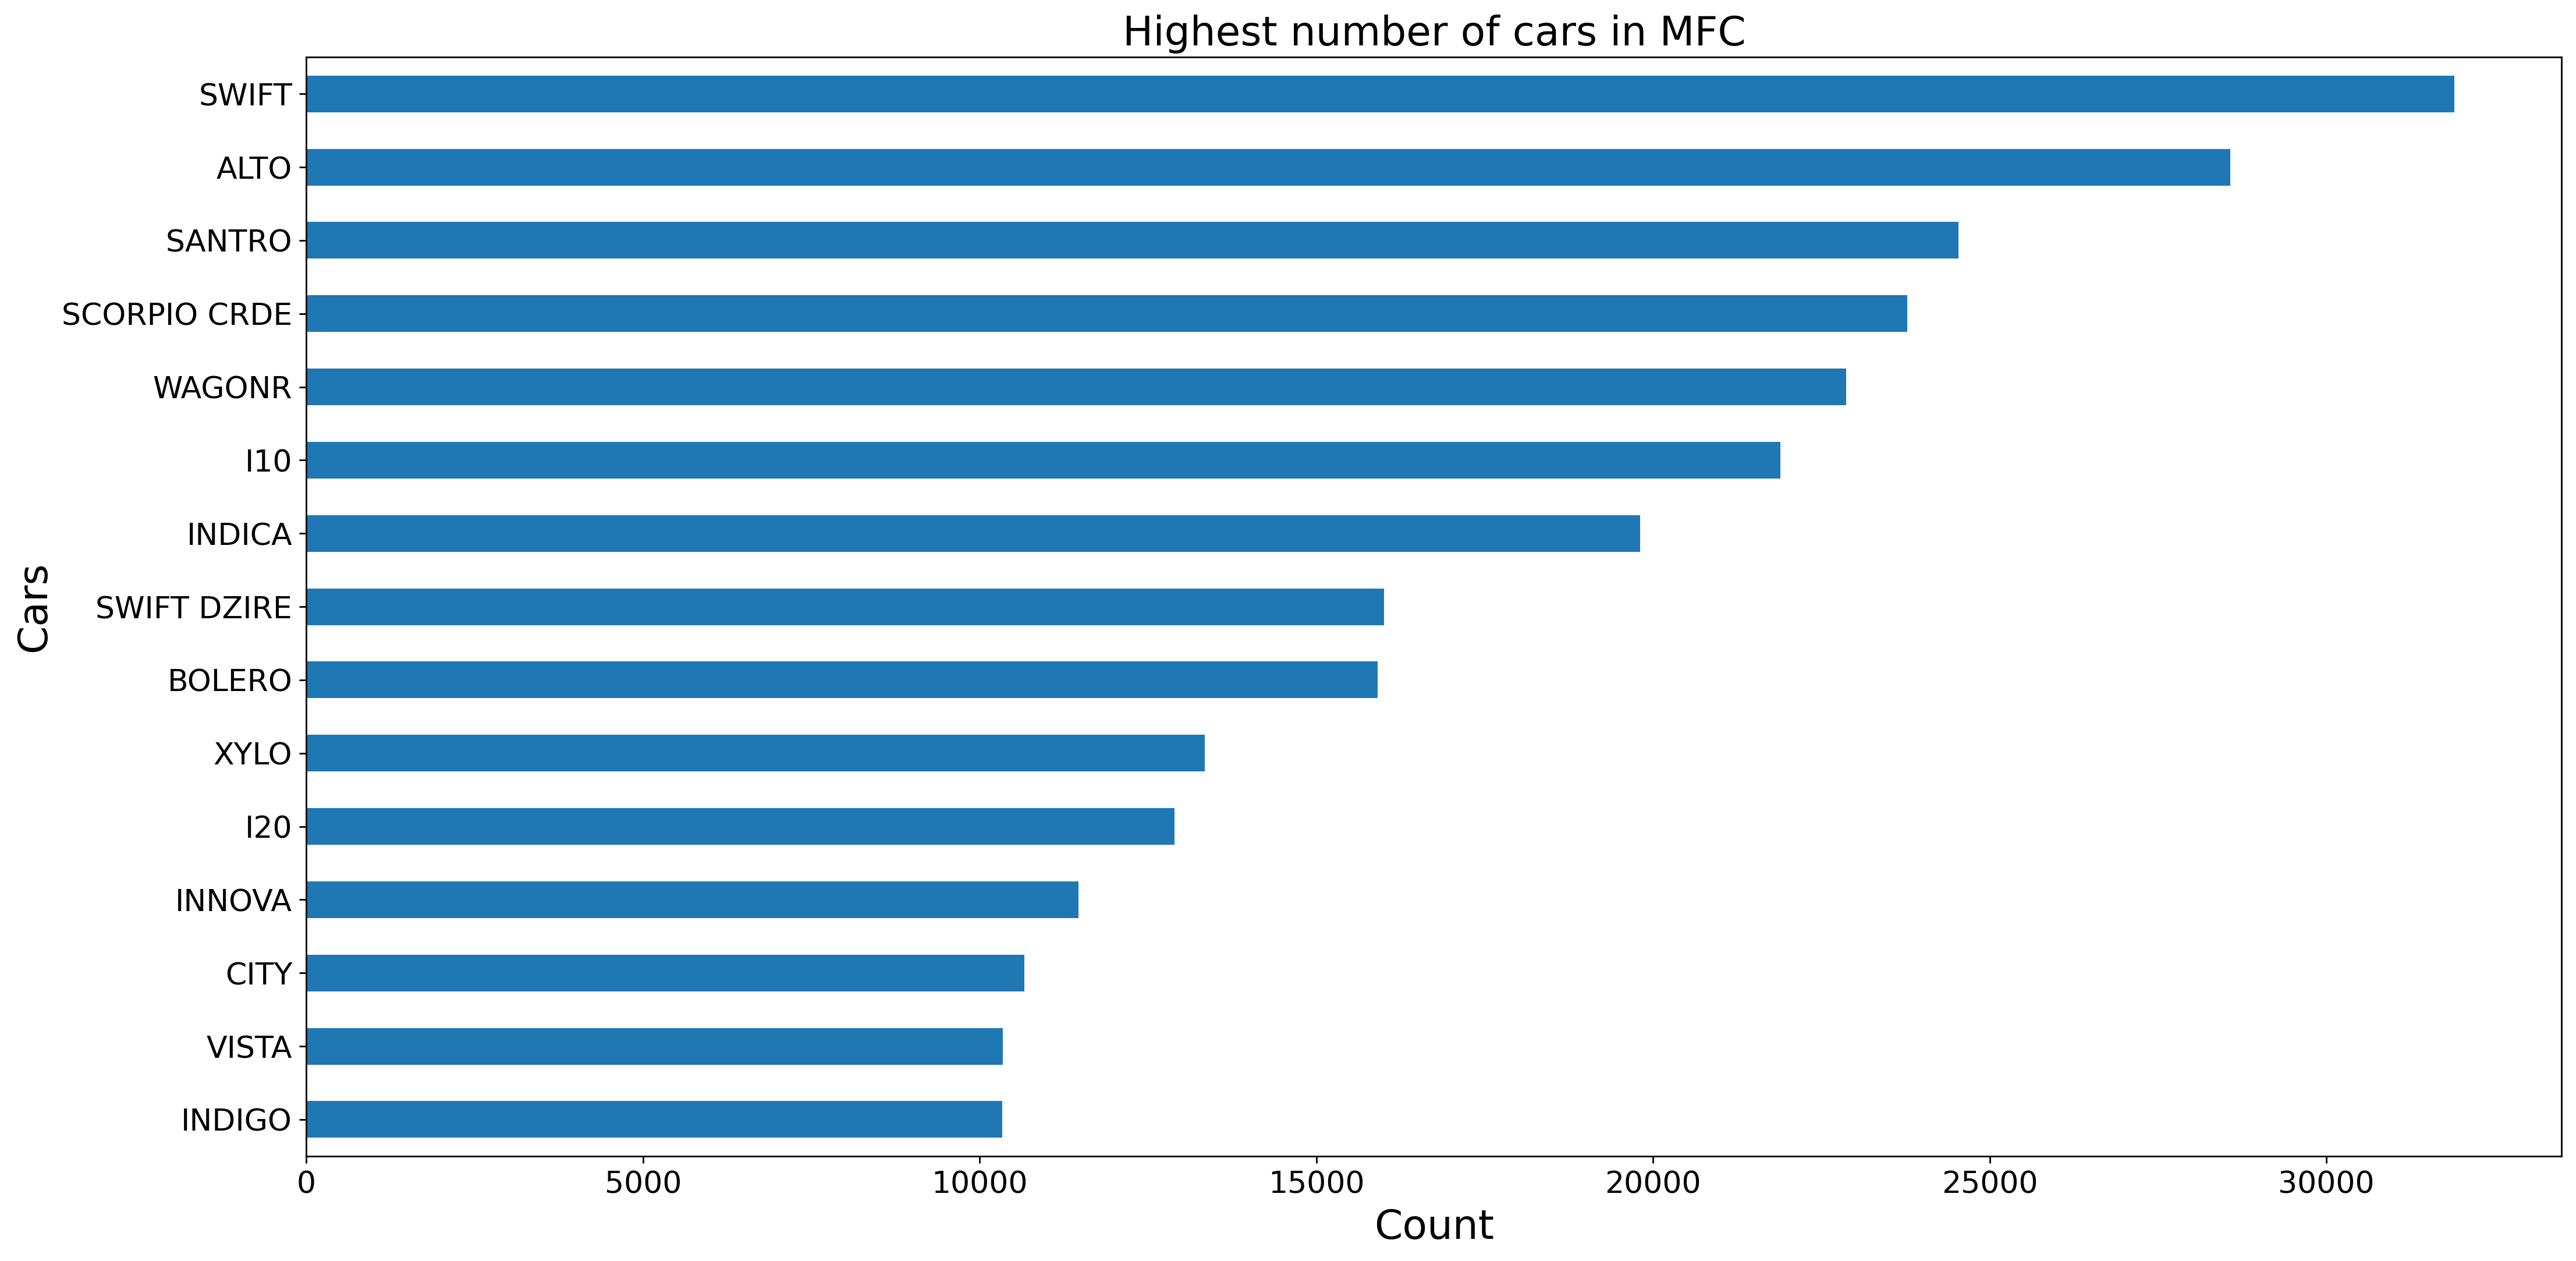

In [77]:
plt.figure(dpi=250)
plt.rcParams.update({'font.size': 15})
Top_15(Final_Invoice,'Model').sort_values(ascending=True).plot.barh(figsize=(20,10))
plt.xlabel('Count',fontsize=20)
plt.ylabel('Cars',fontsize=20)
plt.title('Highest number of cars in MFC',fontsize=20) 



In [79]:
Final_Invoice.groupby(['Make'])['Model'].nunique()

Make
AUDI                     7
BMW                     13
DAEWOO                   3
FIAT                     9
FORCE                    2
FORD                    11
GENERAL MOTORS          19
HINDUSTAN MOTORS         6
HONDA                   10
HYUNDAI                 18
JEEP                     1
LAND ROVER               1
MAHINDRA &  MAHINDRA    27
MARUTI SUZUKI           27
MERCEDES BENZ           14
MITSUBISHI MOTORS        5
MORRIS                   1
NISSAN                   8
PORCHE                   2
PREMIER AUTOMOBILES      2
RENAULT                  8
SAN MOTORS               1
SKODA                    7
SONALIKA                 1
TATA MOTORS             27
TOYOTA                   9
VOLKSWAGEN               6
VOLVO                    2
Name: Model, dtype: int64

Text(0.5, 1.0, 'Most preferred car brands based on MFC Data')

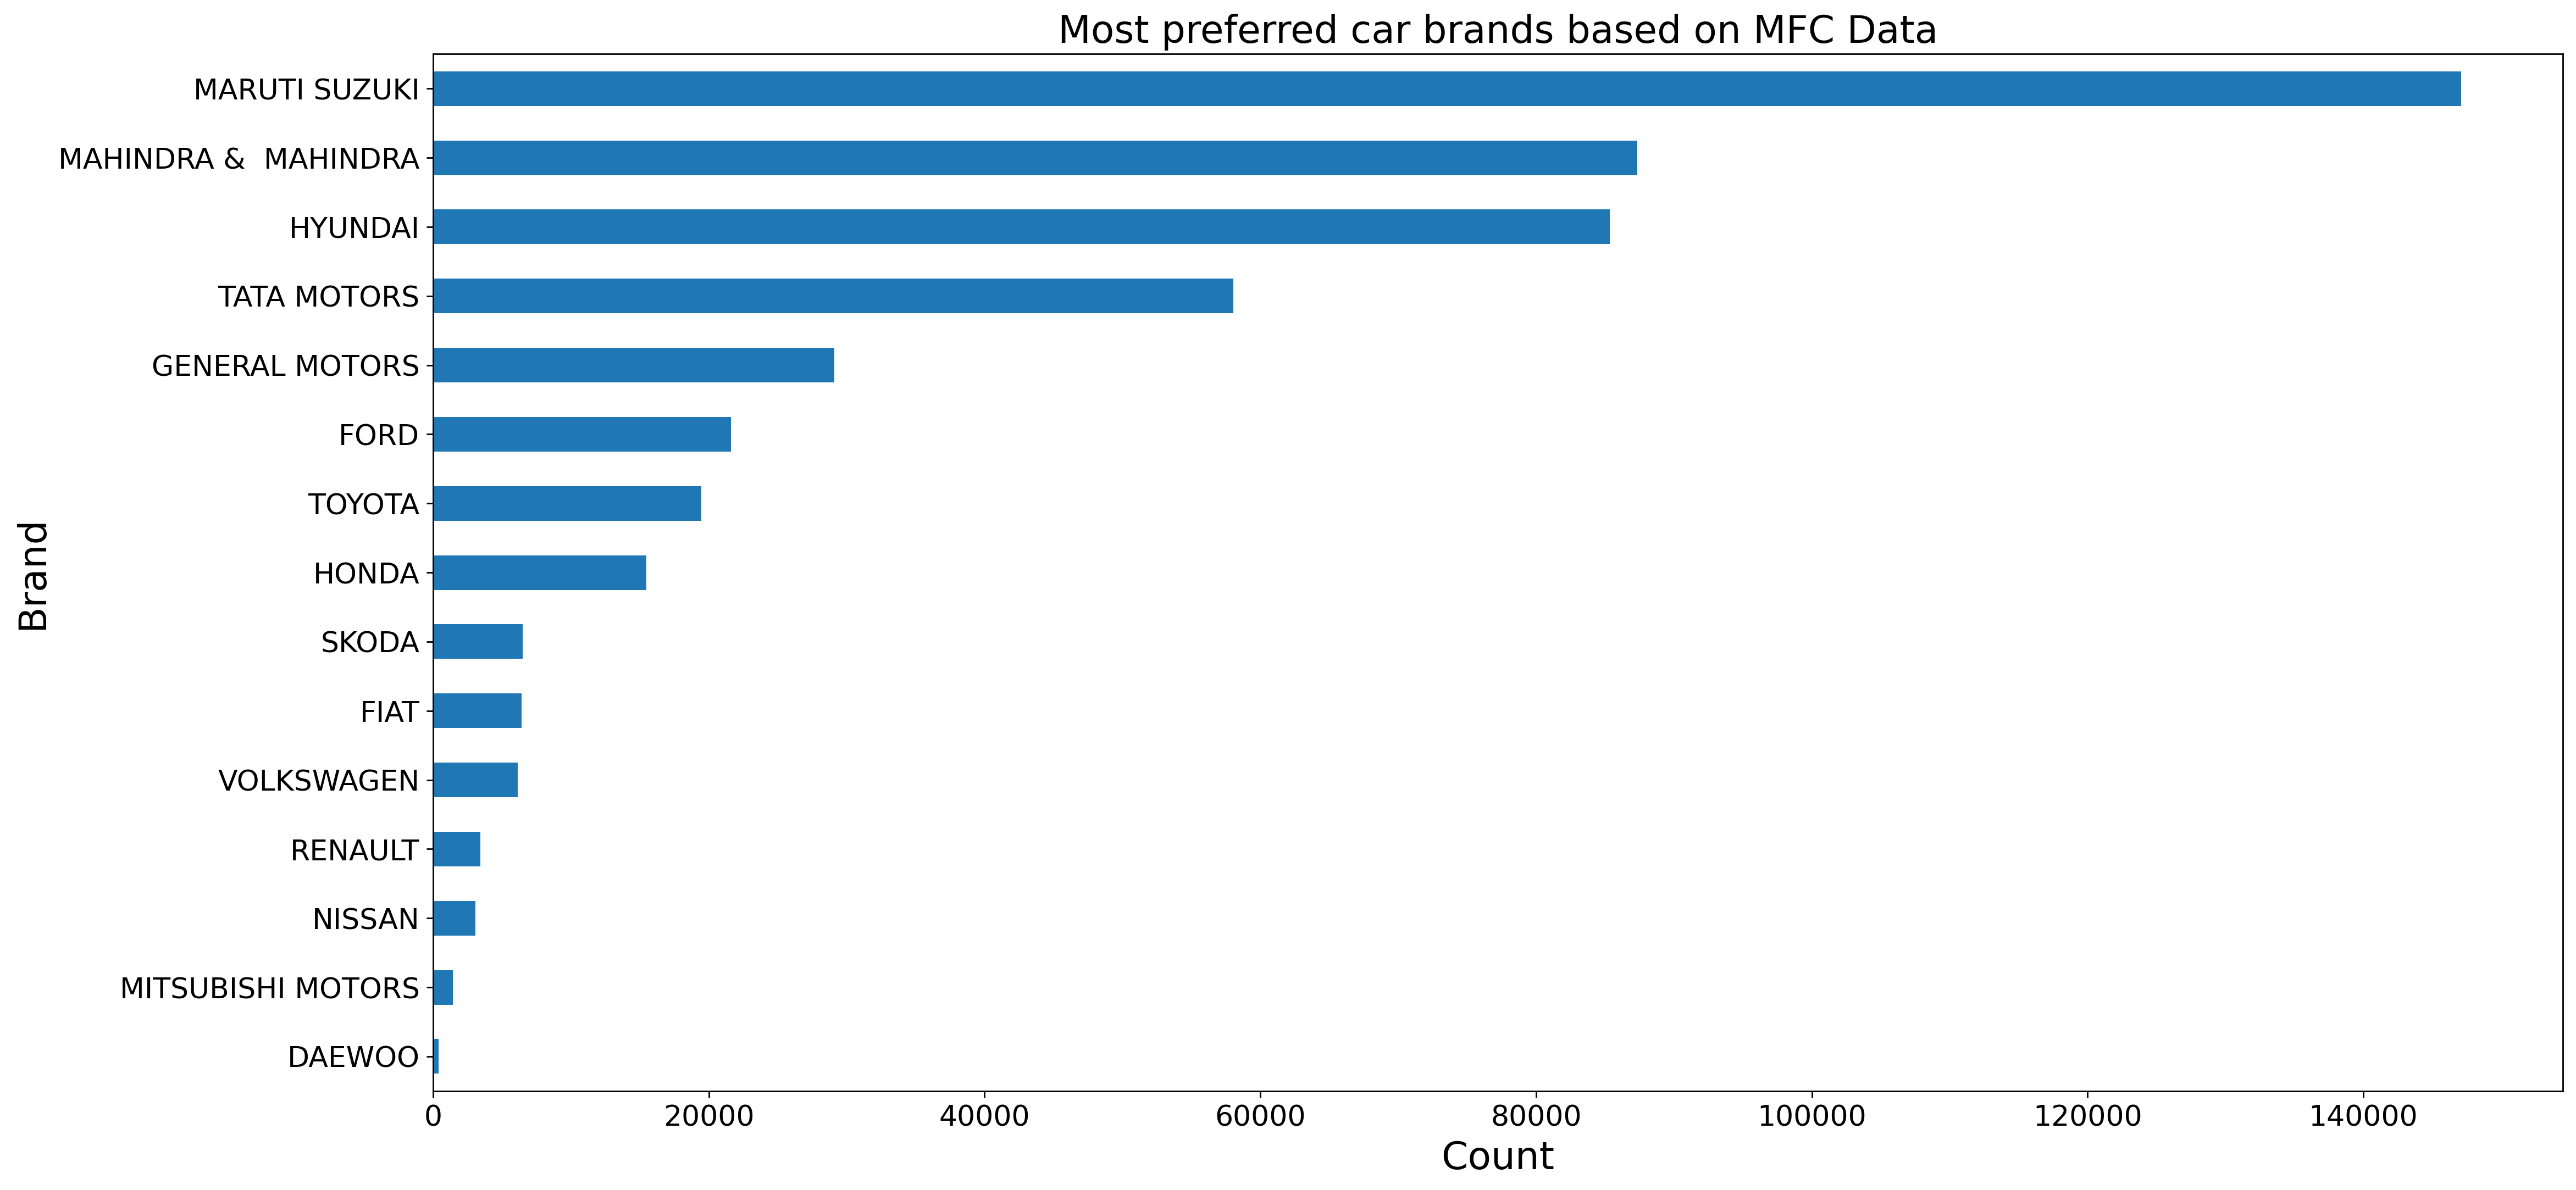

In [89]:
#Most preferred car brands.
plt.figure(dpi=250)
plt.rcParams.update({'font.size': 15})
Top_15(Final_Invoice,'Make').sort_values(ascending=True).plot.barh(figsize=(20,10))
plt.xlabel('Count',fontsize=20)
plt.ylabel('Brand',fontsize=20)
plt.title('Most preferred car brands based on MFC Data',fontsize=20)



In [83]:
Final_Invoice.groupby(['Order Type'])['Total Amt Wtd Tax.'].sum().iplot(kind='bar', yTitle="Total Amount Spent(Rs)")


In [14]:

def Car_Used(df, parameter):
    '''
    Where,
    df: Main Parameter
    parameter: Duration of the car
    
    
    '''
    df[parameter].tolist() #Converting the dataframe to list.
    new_df=[] #Creating a new list.
    mean=df[parameter].mean()
    for i in df[parameter]: #Iterating through each value in the DataFrame.
        #Here, the mean of the DataFrame is 77577.02842697952
        if i < mean:
            new_df.append('Used_less')
        elif i > mean:
            new_df.append('Used_more')
    return new_df
Final_Invoice['Duration']=Car_Used(Final_Invoice,'KMs Reading')

Text(0.5, 1.0, 'Revenue earned per vehicle type(Brand wise)')

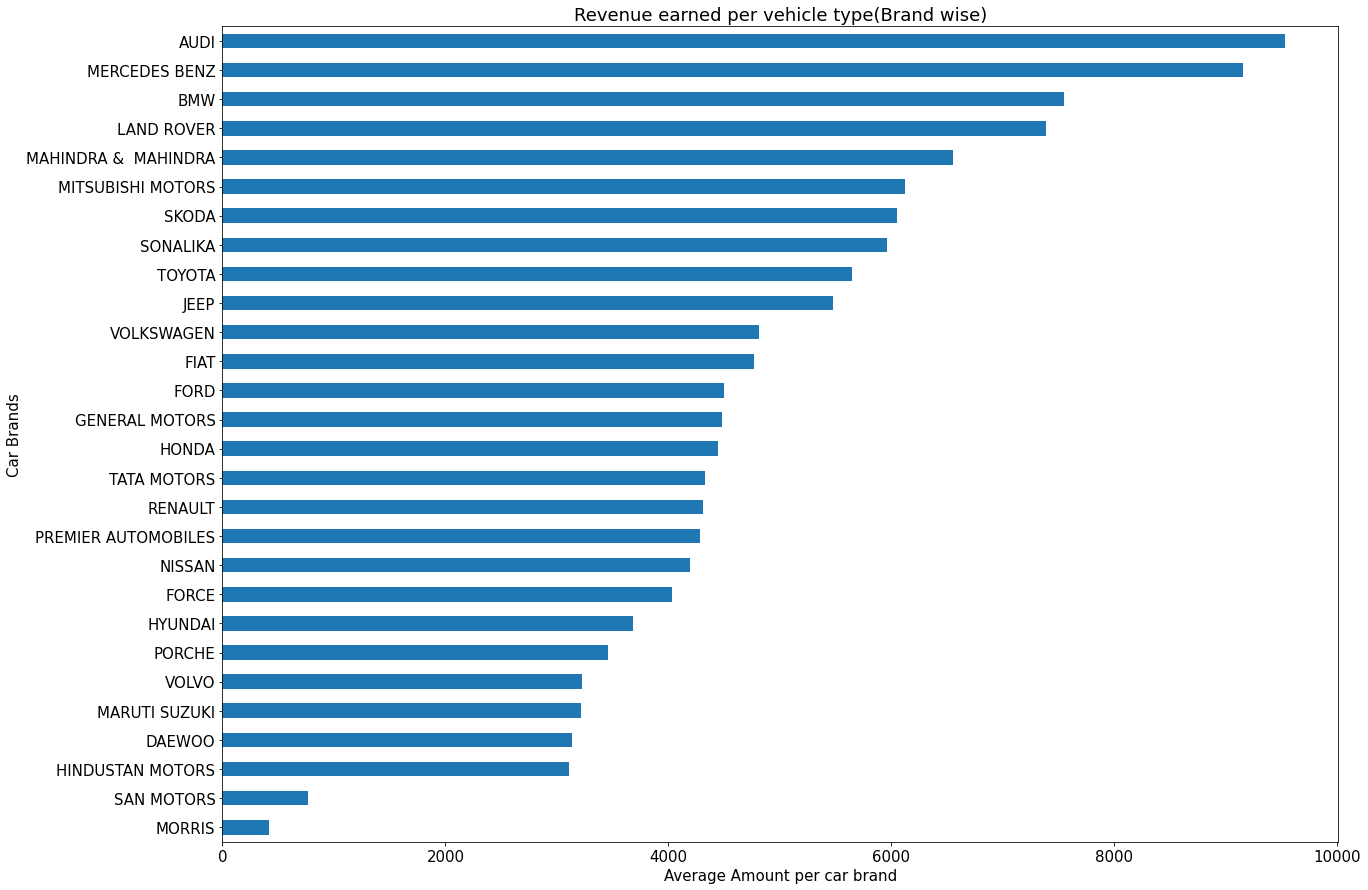

In [85]:
Final_Invoice.groupby(['Make'])['Total Amt Wtd Tax.'].mean().sort_values(ascending=True).plot.barh(figsize=(20,15))
plt.xlabel("Average Amount per car brand")
plt.ylabel("Car Brands")
plt.title("Revenue earned per vehicle type(Brand wise)")

Text(0.5, 1.0, 'MFC Revenue (Car brands)')

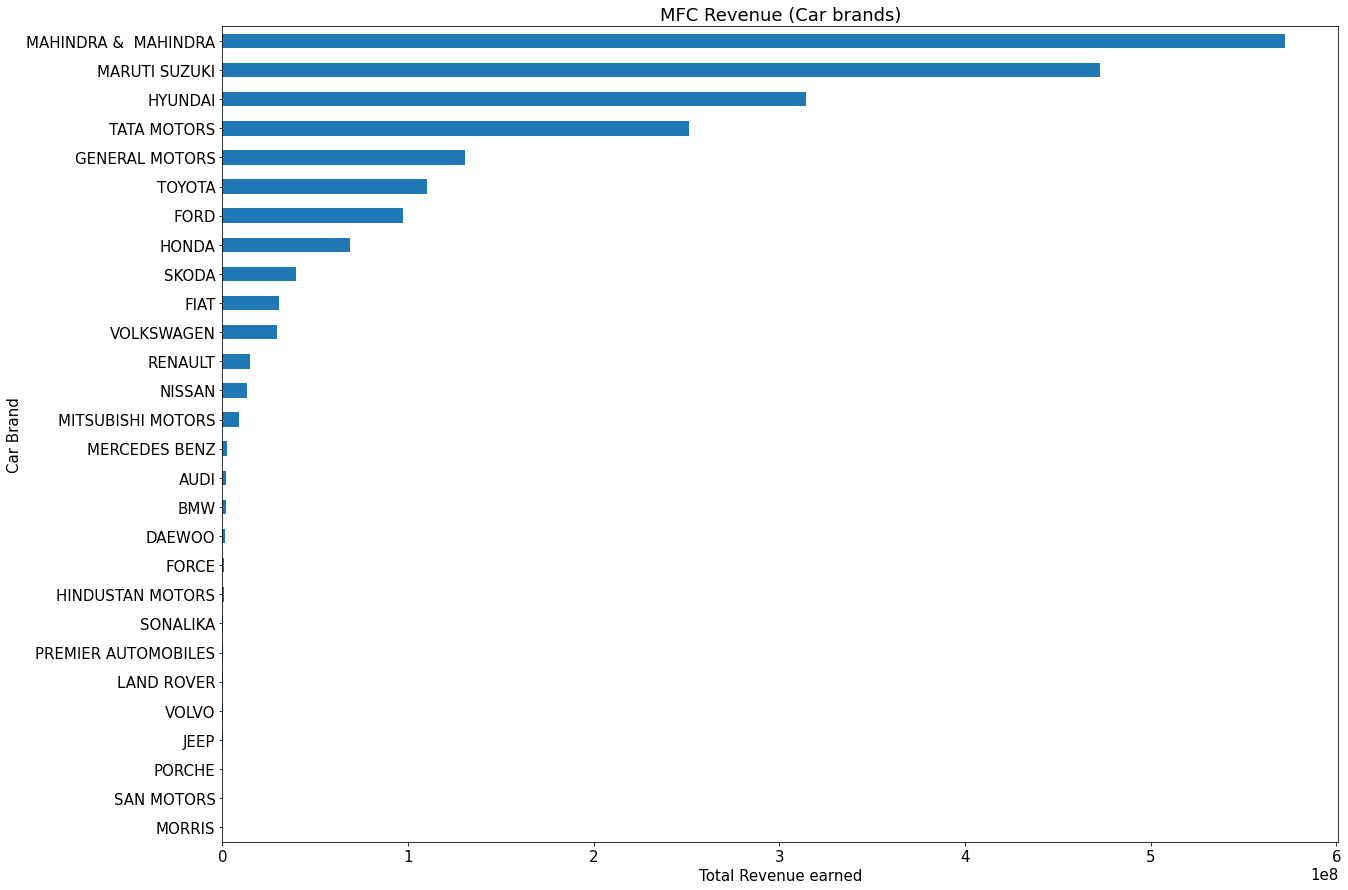

In [87]:
Final_Invoice.groupby(['Make'])['Total Amt Wtd Tax.'].sum().sort_values(ascending=True).plot.barh(figsize=(20,15))
plt.xlabel("Total Revenue earned")
plt.ylabel("Car Brand")
plt.title("MFC Revenue (Car brands)")

In [17]:
Final_Invoice['Car_Segment'].value_counts()

Low_End     490120
High_End      2194
Name: Car_Segment, dtype: int64

In [28]:
'''
Criteria for selection of high end: Average price of the models of each brand is greater than 2.5 Million RS

'''

high_end=['AUDI','BMW','MERCEDES BENZ','PORCHE','LAND ROVER','JEEP','MITSUBISHI MOTORS']

In [33]:


for name in high_end:
    Final_Invoice['Car_Segment'][Final_Invoice['Make']==name] = np.where(Final_Invoice['Make']==name,'Premium','Non-premium')

In [36]:
Final_Invoice['Car_Segment'][Final_Invoice['Model']=='LANCER']='Non-premium'

In [37]:
Final_Invoice['Car_Segment'][Final_Invoice['Model']=='CEDIA']='Non-premium'

In [39]:
Final_Invoice['Car_Segment'][Final_Invoice['Car_Segment']=='Low_End']='Non-premium'

In [34]:
Final_Invoice[(Final_Invoice['Make']=='MITSUBISHI MOTORS')].groupby(['Make'])['Model'].value_counts()

Make               Model    
MITSUBISHI MOTORS  LANCER       899
                   PAJERO       361
                   CEDIA         98
                   MONTERO       43
                   OUTLANDER     26
Name: Model, dtype: int64

In [21]:
from dateutil.relativedelta import *

In [22]:
Final_Invoice['Fiscal_Year']=Final_Invoice['Invoice Date'].apply(lambda x : pd.to_datetime(x)-relativedelta(months=3))

In [23]:
Final_Invoice['Fiscal_Year']=Final_Invoice['Invoice Date'].apply(lambda x : pd.to_datetime(x)-relativedelta(months=3))

In [24]:
Final_Invoice['Fiscal_Year']=Final_Invoice['Fiscal_Year'].dt.to_period('M')

In [25]:
Final_Invoice['Fiscal_Year[Month]']=Final_Invoice['Fiscal_Year'].astype('str').str.split('-',expand=True)[1]

In [26]:
Final_Invoice['Fiscal_Year[Year]']=Final_Invoice['Fiscal_Year'].astype('str').str.split('-',expand=True)[0]

In [40]:
Final_Invoice.groupby(['Fiscal_Year[Year]','Car_Segment'])['KMs Reading'].mean()

Fiscal_Year[Year]  Car_Segment
2012               Non-premium    80354.240896
                   Premium        42973.361702
2013               Non-premium    66636.636176
                   Premium        59285.790323
2014               Non-premium    69346.215017
                   Premium        61492.993056
2015               Non-premium    79440.212399
                   Premium        70282.436620
2016               Non-premium    85847.713485
                   Premium        80812.316888
Name: KMs Reading, dtype: float64

In [43]:
Final_Invoice.groupby(['Plant','Fiscal_Year[Year]'])['Total Amt Wtd Tax.'].sum()

Plant  Fiscal_Year[Year]
BC01   2012                 16088963.21
       2013                 16113697.81
       2014                 16201219.83
       2015                 12215152.57
       2016                   989173.33
                               ...     
X432   2016                    17452.85
X435   2016                  1432200.09
X437   2016                   129253.93
X444   2016                   210855.49
X458   2016                   565522.10
Name: Total Amt Wtd Tax., Length: 438, dtype: float64

In [48]:
Revenue_per_plant=Final_Invoice.groupby(['Plant State Name','Plant'])['Total Amt Wtd Tax.'].sum().reset_index()

In [50]:
Final_Invoice[(Final_Invoice['Car_Segment']=='Premium')].groupby(['Plant State Name','Plant'])['Total Amt Wtd Tax.'].sum().reset_index()

,Plant State Name,Plant,Total Amt Wtd Tax.
0,Andhra Pradesh,BC17,12817.53
1,Andhra Pradesh,X037,21834.92
2,Andhra Pradesh,X054,4055.02
3,Andhra Pradesh,X056,365639.56
4,Andhra Pradesh,X063,2190.87
...,...,...,...
146,Uttar Pradesh,X209,17.47
147,Uttar Pradesh,X224,0.00
148,Uttar Pradesh,X380,893.04
149,Uttarakhand,X233,6979.96


In [52]:
Final_Invoice[(Final_Invoice['Car_Segment']=='Non-premium')].groupby(['Plant State Name','Plant'])['Total Amt Wtd Tax.'].sum().reset_index()

,Plant State Name,Plant,Total Amt Wtd Tax.
0,Andhra Pradesh,BC17,4.527687e+07
1,Andhra Pradesh,X037,2.776904e+06
2,Andhra Pradesh,X054,1.165295e+07
3,Andhra Pradesh,X055,7.867237e+04
4,Andhra Pradesh,X056,6.707058e+06
...,...,...,...
237,West Bengal,X245,3.956834e+06
238,West Bengal,X269,1.569740e+04
239,West Bengal,X270,5.502396e+05
240,West Bengal,X277,8.483544e+05


In [91]:
Revenue_premium=Final_Invoice[(Final_Invoice['Car_Segment']=='Premium')]['Total Amt Wtd Tax.'].sum()

In [92]:
Revenue_non_premium=Final_Invoice[(Final_Invoice['Car_Segment']=='Non-premium')]['Total Amt Wtd Tax.'].sum()

In [93]:
(Revenue_premium/(Revenue_non_premium+Revenue_premium))*100

0.4847483385184036

In [94]:
(Revenue_non_premium/(Revenue_non_premium+Revenue_premium))*100

99.5152516614816

In [130]:
Final_Invoice[(Final_Invoice['Car_Segment']=='Premium')].groupby(['Order Type'])['Total Amt Wtd Tax.'].sum().iplot(kind='bar',xTitle='Type of repair for Premium Vehicles', yTitle='Total amount in Rs', colors='blue')

In [128]:
Final_Invoice[(Final_Invoice['Car_Segment']=='Non-premium')].groupby(['Order Type'])['Total Amt Wtd Tax.'].sum().iplot(kind='bar',xTitle='Type of repair for Non-Premium Vehicles', yTitle='Total amount in Rs', colors='blue')

In [55]:
Final_Invoice.columns

Index(['Unnamed: 0', 'Cust Type', 'Customer No.', 'Invoice Date', 'Invoice No',
       'Job Card No', 'JobCard Date', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'OSL Total', 'Order Type', 'Parts Total',
       'Pin code', 'Plant', 'Plant Name1', 'Recovrbl Exp', 'Regn No',
       'Total Amt Wtd Tax.', 'User ID', 'Client State Name',
       'Client District Name', 'Client latitude', 'Client longitude',
       'Country', 'Car_Segment', 'Plant Postal Code', 'Plant State Name',
       'Plant District Name', 'Plant latitude', 'Plant longitude',
       'Plant Name', 'Client Dist. lat', 'Client Dist. lon',
       'Client State lat', 'Client State lon', 'Plant Dist. lat',
       'Plant Dist. lon', 'Plant State lat', 'Plant State lon', 'Duration',
       'Fiscal_Year', 'Fiscal_Year[Month]', 'Fiscal_Year[Year]'],
      dtype='object')

In [61]:
Final_Invoice[(Final_Invoice['Order Type']=="Accidental")].groupby(['Client State Name','Make'])['Model'].value_counts()

Client State Name  Make         Model      
Andhra Pradesh     AUDI         A6              1
                   DAEWOO       MATIZ           2
                   FIAT         GRAND PUNTO    11
                                LINEA          11
                                PALIO           2
                                               ..
West Bengal        TATA MOTORS  SUMO GRANDE     2
                                INDICA          1
                   TOYOTA       ETIOS           1
                                INNOVA          1
                                QUALIS          1
Name: Model, Length: 1962, dtype: int64

Text(0.5, 1.0, 'Count in states(Accidental Repair)')

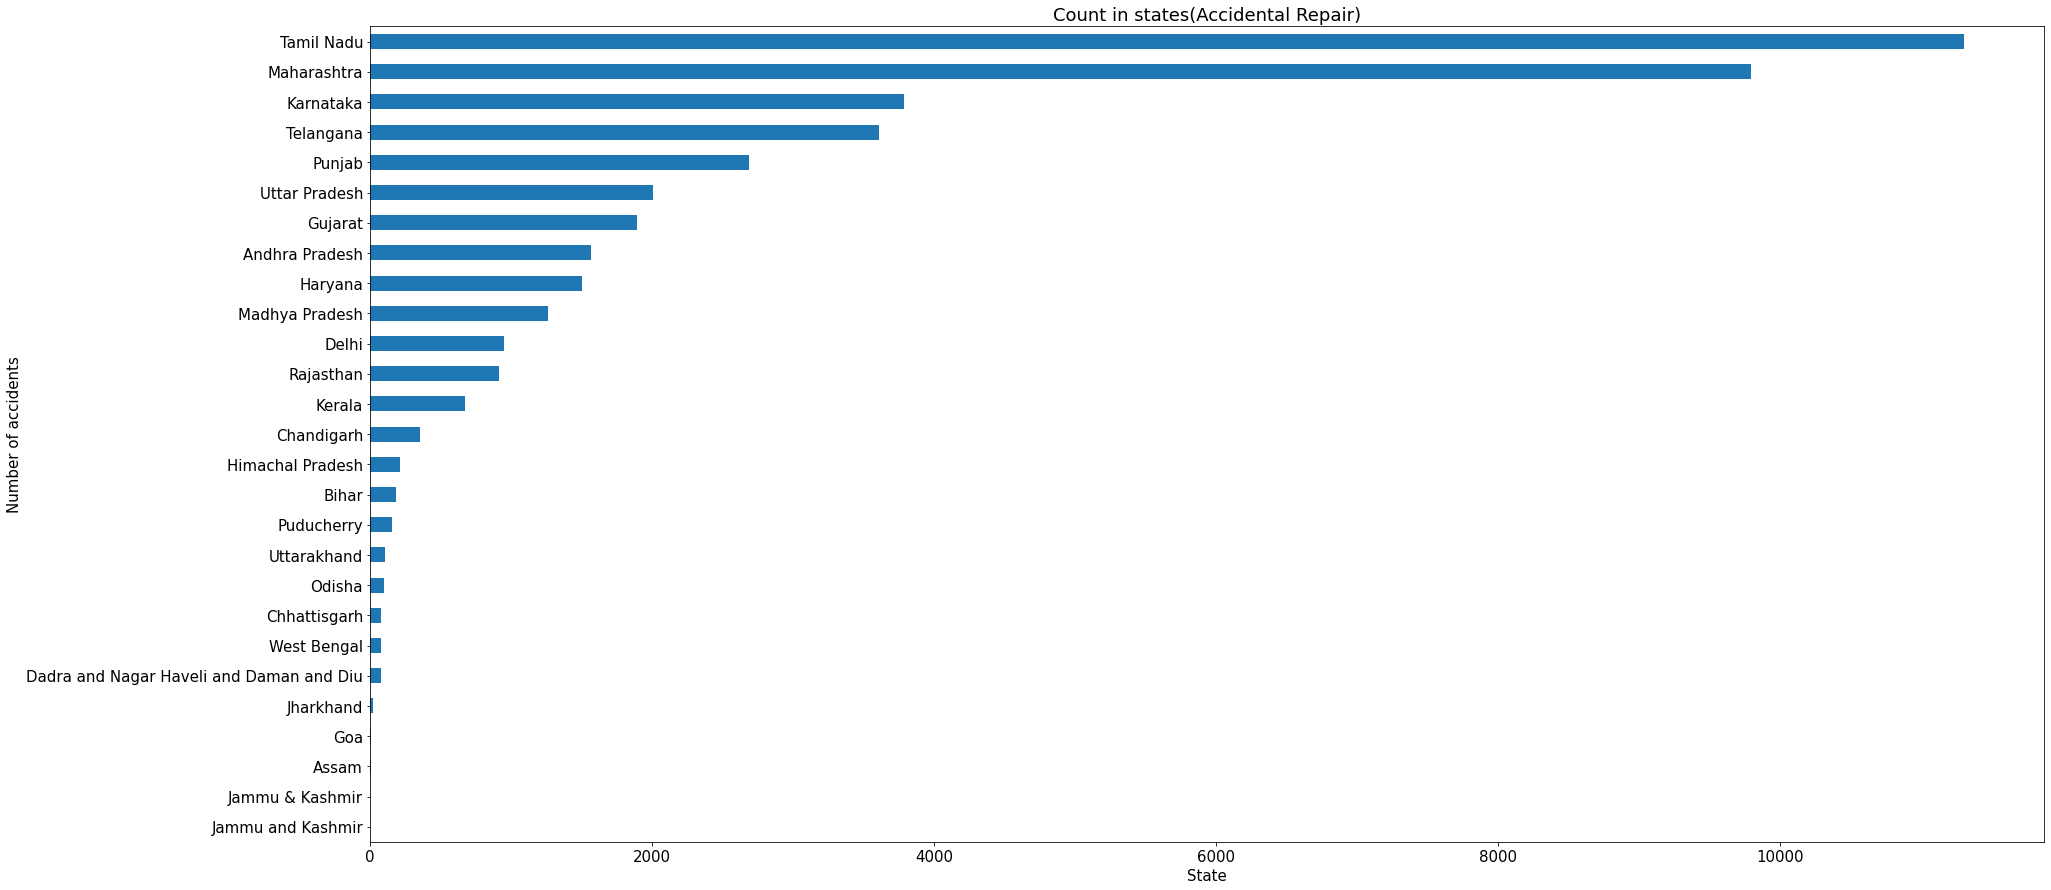

In [114]:
Final_Invoice[(Final_Invoice['Order Type']=='Accidental')]['Client State Name'].value_counts().sort_values(ascending=True).plot.barh(figsize=(30,15))
plt.xlabel("State")
plt.ylabel("Number of accidents")
plt.title("Count in states(Accidental Repair)")

In [101]:
Final_Invoice[(Final_Invoice['Client State Name']=='Tamil Nadu')]['Client District Name'].nunique()

67

In [177]:
Final_Invoice['Jammu & Kashmir']="Jammu and Kashmir"

In [178]:
Final_Invoice.drop(['Jammu & Kashmir'],1,inplace=True)

In [179]:
Final_Invoice['Client State Name'][Final_Invoice['Client State Name']=='Jammu & Kashmir']="Jammu and Kashmir"

Text(0.5, 1.0, 'Count in states(Accidental Repair)')

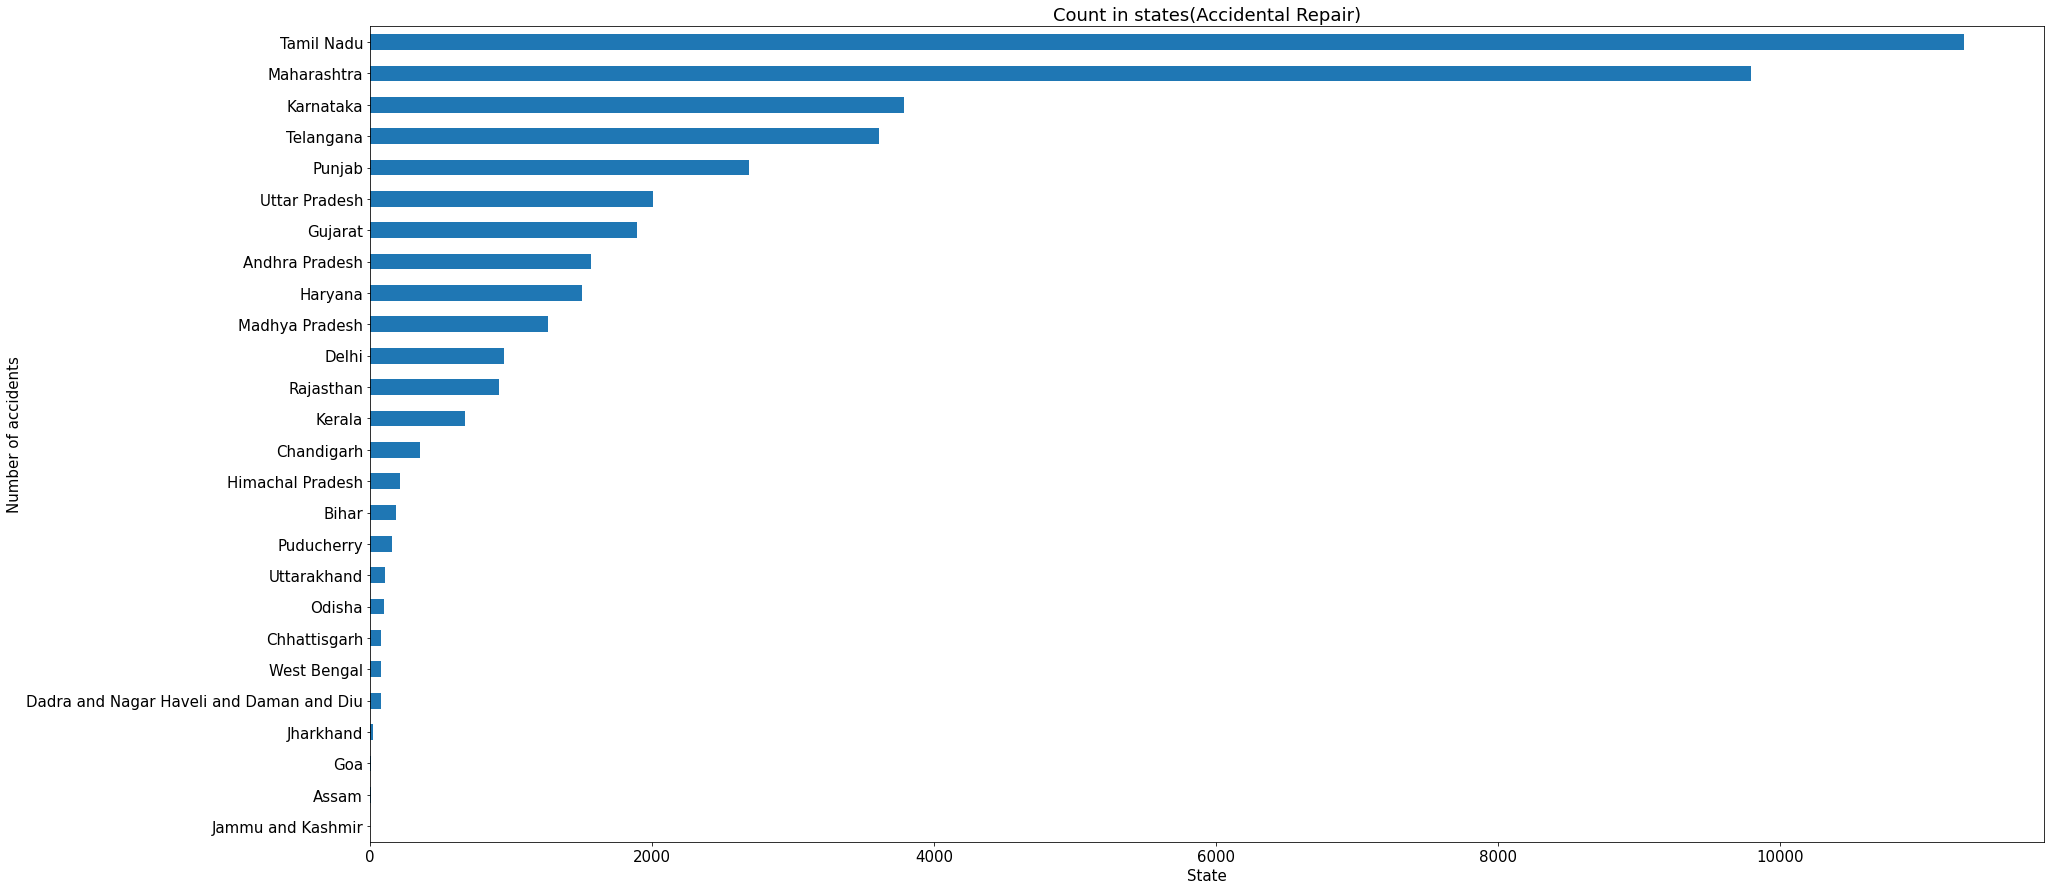

In [180]:
Final_Invoice[(Final_Invoice['Order Type']=='Accidental')]['Client State Name'].value_counts().sort_values(ascending=True).plot.barh(figsize=(30,15))
plt.xlabel("State")
plt.ylabel("Number of accidents")
plt.title("Count in states(Accidental Repair)")

Text(0.5, 1.0, 'Top 30 cities(Accidental Repair)')

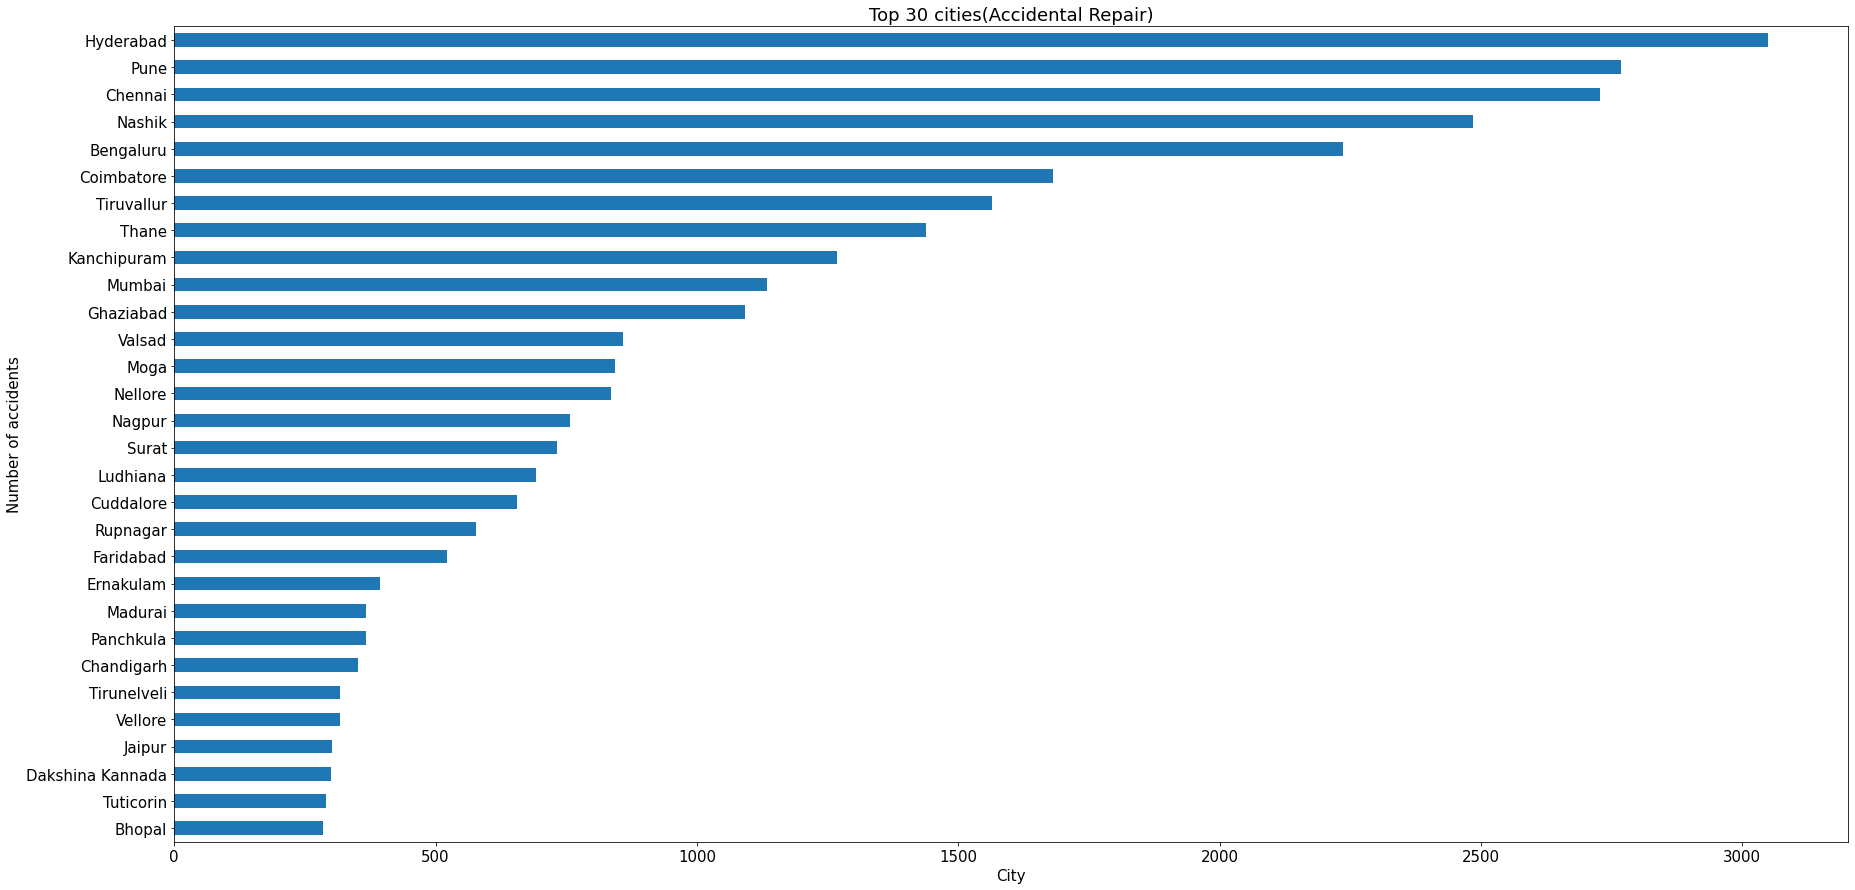

In [112]:
Final_Invoice[(Final_Invoice['Order Type']=='Accidental')]['Client District Name'].value_counts()[0:30].sort_values(ascending=True).plot.barh(figsize=(30,15))
plt.xlabel("City")
plt.ylabel("Number of accidents")
plt.title("Top 30 cities(Accidental Repair)")

In [67]:
Final_Invoice[(Final_Invoice['Order Type']=='Accidental')]['Make'].value_counts()[0:30]..plot.barh(figsize=(30,15))
plt.xlabel("City")

MARUTI SUZUKI           11851
HYUNDAI                  7844
MAHINDRA &  MAHINDRA     6887
TATA MOTORS              4305
TOYOTA                   2833
GENERAL MOTORS           2388
FORD                     2256
HONDA                    2124
VOLKSWAGEN                959
SKODA                     827
FIAT                      630
RENAULT                   428
NISSAN                    421
MITSUBISHI MOTORS         151
BMW                        65
MERCEDES BENZ              62
AUDI                       56
FORCE                      19
DAEWOO                     14
HINDUSTAN MOTORS           14
LAND ROVER                  8
PREMIER AUTOMOBILES         6
SONALIKA                    6
PORCHE                      2
VOLVO                       2
JEEP                        1
Name: Make, dtype: int64

In [75]:
def Plant_Performance(mainDF, Plant, Revenue,q1,q2):
    '''
    Where,
    mainDF: Main DataFrame
    Revenue: Total revenue generated.
    Invoice: The invoice feature.
    q1: Quantile value 1 (Value must be greater than zero and less than 1)
    q2: Quantile value 2 (Value must be greater than zero and less than 1)
    
    '''
    Plant_Names=list(mainDF[Plant].unique())
    temp=pd.DataFrame()
    temp1=[]
    min_thresh=mainDF[Revenue].quantile(q=0.1)
    sec_thresh=mainDF[Revenue].quantile(q=0.25)
    
    for i,j in zip(mainDF[Plant], mainDF[Revenue]):
        if j<min_thresh:
            temp1.append('Less_Performing')
        elif j> min_thresh and j<sec_thresh:
            temp1.append('Average_Performing')
        else:
            temp1.append('Good_Performing')
    temp['Plant']=mainDF[Plant]
    temp['Plant_Performace']=temp1
    return pd.DataFrame(temp)

        

In [116]:
Final_Invoice.columns

Index(['Unnamed: 0', 'Cust Type', 'Customer No.', 'Invoice Date', 'Invoice No',
       'Job Card No', 'JobCard Date', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'OSL Total', 'Order Type', 'Parts Total',
       'Pin code', 'Plant', 'Plant Name1', 'Recovrbl Exp', 'Regn No',
       'Total Amt Wtd Tax.', 'User ID', 'Client State Name',
       'Client District Name', 'Client latitude', 'Client longitude',
       'Country', 'Car_Segment', 'Plant Postal Code', 'Plant State Name',
       'Plant District Name', 'Plant latitude', 'Plant longitude',
       'Plant Name', 'Client Dist. lat', 'Client Dist. lon',
       'Client State lat', 'Client State lon', 'Plant Dist. lat',
       'Plant Dist. lon', 'Plant State lat', 'Plant State lon', 'Duration',
       'Fiscal_Year', 'Fiscal_Year[Month]', 'Fiscal_Year[Year]'],
      dtype='object')

In [122]:
Final_Invoice['Fiscal_Year[Year]'].value_counts()

2016    152446
2015    143689
2014     95769
2013     73588
2012     26822
Name: Fiscal_Year[Year], dtype: int64

In [124]:
Final_Invoice[(Final_Invoice['Fiscal_Year[Year]']==2013)].groupby(['Fiscal_Year[Month]'])['Total Amt Wtd Tax.'].sum()

Series([], Name: Total Amt Wtd Tax., dtype: float64)

In [127]:
Final_Invoice.groupby(['Fiscal_Year[Year]'])['Total Amt Wtd Tax.'].sum().iplot(kind='bar', colors='blue')

In [145]:
y=pd.DataFrame(Final_Invoice.groupby(['Fiscal_Year[Year]'])['Total Amt Wtd Tax.'].sum())

In [152]:
y=y.reset_index()

In [ ]:
def Year_on_year_growth(maindf, year, total_amount):
    growth=[]
    for i+1,j+1 in zip(maindf[year],maindf[total_amount]):
        
    

Series([], Name: Total Amt Wtd Tax., dtype: float64)

In [135]:
Final_Invoice['Fiscal_Year[Year]']=Final_Invoice['Fiscal_Year[Year]'].astype(int)

In [141]:
(Final_Invoice[(Final_Invoice['Fiscal_Year[Year]']==2013)]['Total Amt Wtd Tax.'].sum()-Final_Invoice[(Final_Invoice['Fiscal_Year[Year]']==2012)]['Total Amt Wtd Tax.'].sum())/Final_Invoice[(Final_Invoice['Fiscal_Year[Year]']==2012)]['Total Amt Wtd Tax.'].sum()

1.3101788206435587

In [139]:
i=2012
while i<=2016:
    print(i)
    i+=1

2012
2013
2014
2015
2016


In [153]:
y

,Fiscal_Year[Year],Total Amt Wtd Tax.
0,2012,1.233690e+08
1,2013,2.850044e+08
2,2014,4.364953e+08
3,2015,6.595617e+08
4,2016,6.592819e+08


In [159]:
new=[]
x=y['Total Amt Wtd Tax.']
for i in range(len(y)-1):
    new.append(((x[i+1]-x[i])/x[i])*100)

    

In [160]:
new

[131.01788206436098,
 53.153866286048654,
 51.1039525418153,
 -0.04242330779971744]

In [161]:
Final_Invoice.columns

Index(['Unnamed: 0', 'Cust Type', 'Customer No.', 'Invoice Date', 'Invoice No',
       'Job Card No', 'JobCard Date', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'OSL Total', 'Order Type', 'Parts Total',
       'Pin code', 'Plant', 'Plant Name1', 'Recovrbl Exp', 'Regn No',
       'Total Amt Wtd Tax.', 'User ID', 'Client State Name',
       'Client District Name', 'Client latitude', 'Client longitude',
       'Country', 'Car_Segment', 'Plant Postal Code', 'Plant State Name',
       'Plant District Name', 'Plant latitude', 'Plant longitude',
       'Plant Name', 'Client Dist. lat', 'Client Dist. lon',
       'Client State lat', 'Client State lon', 'Plant Dist. lat',
       'Plant Dist. lon', 'Plant State lat', 'Plant State lon', 'Duration',
       'Fiscal_Year', 'Fiscal_Year[Month]', 'Fiscal_Year[Year]'],
      dtype='object')

In [ ]:
#Analysing several parameters vs Amount spent/km/year run.[Harsh Parikh]
#Analysing several parameters vs Amount spent/year[Harsh Parikh]

In [165]:
Total_amount_per_km=Final_Invoice.groupby(['Fiscal_Year[Year]'])['Total Amt Wtd Tax.','KMs Reading'].sum().reset_index()

<ipython-input-165-600393e17c5c>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
Final_Invoice.groupby(['Fiscal_Year[Year]'])['KMs Reading'].sum()

In [167]:
Final_Invoice.groupby(['Plant','Fiscal_Year[Year]'])['Total Amt Wtd Tax.'].sum().reset_index().groupby(['Plant'])['Total Amt Wtd Tax.'].mean()

Plant
BC01    1.232164e+07
BC02    1.041278e+07
BC03    2.175364e+07
BC04    9.038373e+06
BC05    1.507757e+07
            ...     
X432    1.745285e+04
X435    1.432200e+06
X437    1.292539e+05
X444    2.108555e+05
X458    5.655221e+05
Name: Total Amt Wtd Tax., Length: 242, dtype: float64

In [170]:
#Calculating average amount of all years of a plant.
Total_Revenue_per_plant=pd.DataFrame(Final_Invoice.groupby(['Plant','Fiscal_Year[Year]'])['Total Amt Wtd Tax.'].sum().reset_index().groupby(['Plant'])['Total Amt Wtd Tax.'].mean())

In [173]:
Total_Revenue_per_plant=Total_Revenue_per_plant.sort_values(by=['Total Amt Wtd Tax.'],ascending=False)

In [174]:
Total_Revenue_per_plant

,Total Amt Wtd Tax.
Plant,
BC03,2.175364e+07
BC06,2.124383e+07
BC07,1.676087e+07
BC05,1.507757e+07
BC01,1.232164e+07
...,...
X119,1.235605e+04
X339,1.172003e+04
X359,1.937890e+03


In [176]:
Final_Invoice.columns

Index(['Unnamed: 0', 'Cust Type', 'Customer No.', 'Invoice Date', 'Invoice No',
       'Job Card No', 'JobCard Date', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'OSL Total', 'Order Type', 'Parts Total',
       'Pin code', 'Plant', 'Plant Name1', 'Recovrbl Exp', 'Regn No',
       'Total Amt Wtd Tax.', 'User ID', 'Client State Name',
       'Client District Name', 'Client latitude', 'Client longitude',
       'Country', 'Car_Segment', 'Plant Postal Code', 'Plant State Name',
       'Plant District Name', 'Plant latitude', 'Plant longitude',
       'Plant Name', 'Client Dist. lat', 'Client Dist. lon',
       'Client State lat', 'Client State lon', 'Plant Dist. lat',
       'Plant Dist. lon', 'Plant State lat', 'Plant State lon', 'Duration',
       'Fiscal_Year', 'Fiscal_Year[Month]', 'Fiscal_Year[Year]'],
      dtype='object')

In [181]:
params=['Cust Type', 'Customer No.', 'Invoice Date','JobCard Date', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'OSL Total', 'Order Type', 'Parts Total',
        'Plant', 'Recovrbl Exp', 'Regn No',
       'Total Amt Wtd Tax.', 'Client State Name',
       'Client latitude', 'Client longitude',
       'Car_Segment','Plant State Name',
        'Plant latitude', 'Plant longitude',
        'Fiscal_Year', 'Fiscal_Year[Month]', 'Fiscal_Year[Year]']

In [184]:
Final_Invoice['time_diff'] = pd.to_datetime(Final_Invoice['Invoice Date'])-pd.to_datetime(Final_Invoice['JobCard Date'])
Final_Invoice['time_diff']=Final_Invoice['time_diff'].apply(lambda x : x.total_seconds())

In [186]:
Final_Invoice['time_diff']=round(Final_Invoice['time_diff']/3600)

In [188]:
Final_Invoice['time_diff'].mean()

83.41354704517849

Text(0.5, 1.0, 'Average number of down time of each car brand')

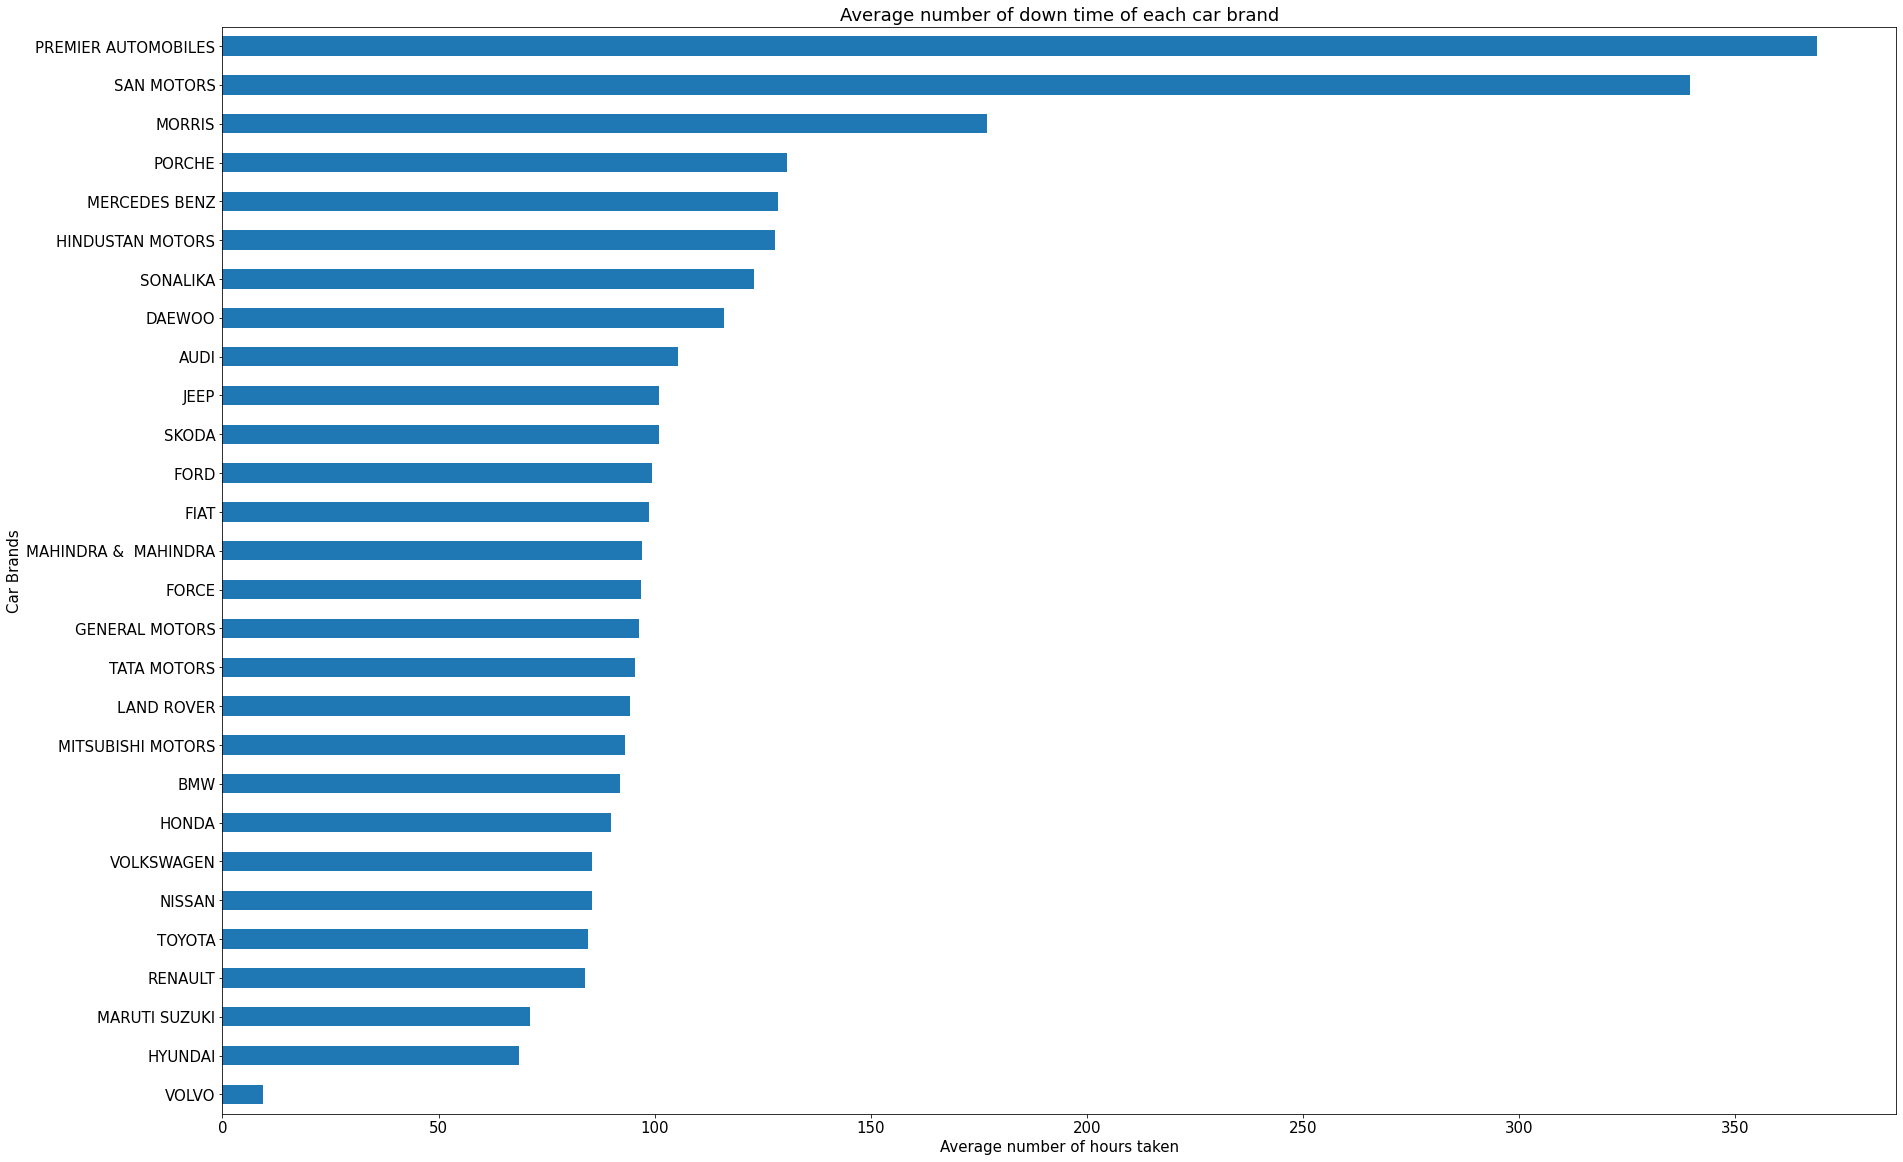

In [196]:
Final_Invoice.groupby(['Make'])['time_diff'].mean().sort_values(ascending=True).plot.barh(figsize=(30,20))
plt.xlabel('Average number of hours taken')
plt.ylabel('Car Brands')
plt.title('Average number of down time of each car brand')

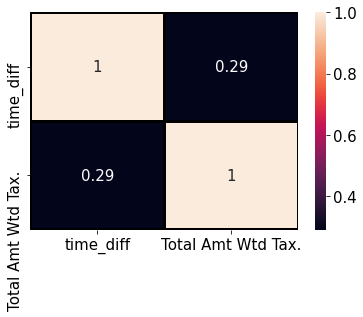

In [202]:
sns.heatmap(Final_Invoice[['Customer No.','time_diff','Total Amt Wtd Tax.']].corr(), annot=True, linecolor='black',linewidths=2)

In [203]:
#Final_Invoice['time_diff'].to_csv('Job Downtime.csv')

In [207]:
Final_Invoice.groupby(['Plant'])['Total Amt Wtd Tax.','time_diff'].mean().reset_index()

<ipython-input-207-f725972ec27a>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Plant,Total Amt Wtd Tax.,time_diff
0,BC01,4253.829093,58.848098
1,BC02,3805.377264,76.452187
2,BC03,3801.090226,47.051756
3,BC04,5792.590989,60.463149
4,BC05,5658.474461,77.914284
...,...,...,...
237,X432,1586.622727,7.272727
238,X435,9064.557532,51.696203
239,X437,6462.696500,16.650000
240,X444,1484.897817,25.866197


<ipython-input-211-708545738f66>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



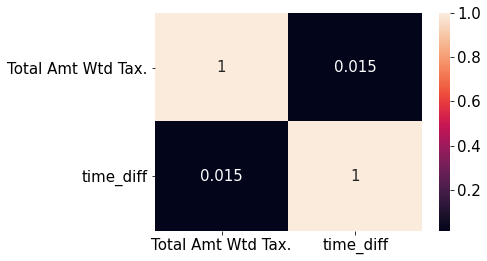

In [211]:
sns.heatmap((Final_Invoice.groupby(['Plant'])['Total Amt Wtd Tax.','time_diff'].mean().reset_index().corr()), annot=True)

In [208]:
#Final_Invoice.to_csv('Clean_Final_Invoice.csv')

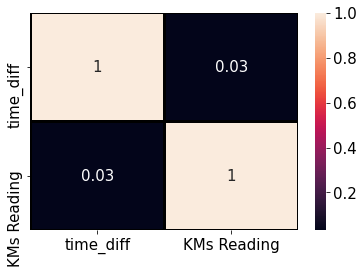

In [209]:
sns.heatmap(Final_Invoice[['Customer No.','time_diff','KMs Reading']].corr(), annot=True, linecolor='black',linewidths=2)

In [239]:
r=Final_Invoice.groupby(['Client State Name'])['Order Type'].value_counts().unstack().T
r=r.reset_index()
r=r.set_index('Order Type')
r.columns

Index(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Mizoram', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'],
      dtype='object', name='Client State Name')

In [241]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
    

In [248]:
Final_Invoice.groupby(['Make'])['Model'].value_counts()

Make        Model     
AUDI        A4            74
            Q5            58
            Q7            55
            A6            24
            A8             6
                          ..
VOLKSWAGEN  PASSAT        68
            TOUAREG        6
            AMEO           5
VOLVO       VOLVO XC90    13
            VOLVO S80      6
Name: Model, Length: 247, dtype: int64

In [249]:
Final_Invoice['Make'].nunique()

28

In [250]:
Final_Invoice['Make'].unique()

array(['GENERAL MOTORS', 'TATA MOTORS', 'MARUTI SUZUKI', 'HYUNDAI',
       'TOYOTA', 'HONDA', 'FIAT', 'FORD', 'SKODA', 'MAHINDRA &  MAHINDRA',
       'VOLKSWAGEN', 'NISSAN', 'RENAULT', 'MERCEDES BENZ',
       'MITSUBISHI MOTORS', 'DAEWOO', 'BMW', 'FORCE', 'SONALIKA', 'VOLVO',
       'HINDUSTAN MOTORS', 'AUDI', 'PREMIER\xa0AUTOMOBILES', 'PORCHE',
       'LAND ROVER', 'JEEP', 'MORRIS', 'SAN MOTORS'], dtype=object)

Text(0.5, 1.0, 'Car models of Maruti Suzuki')

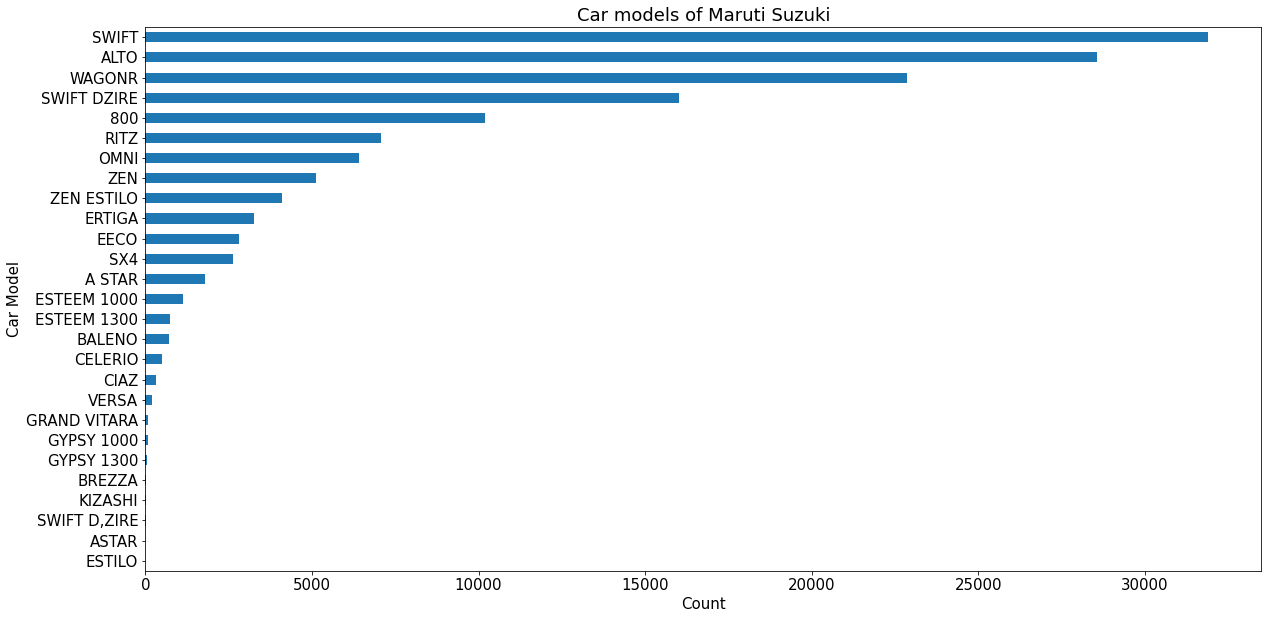

In [261]:
Final_Invoice[(Final_Invoice['Make']=='MARUTI SUZUKI')]['Model'].value_counts().sort_values(ascending=True).plot.barh(figsize=(20,10))
plt.xlabel("Count")
plt.ylabel("Car Model")
plt.title("Car models of Maruti Suzuki")

Text(0.5, 1.0, 'Car models of Mahindra')

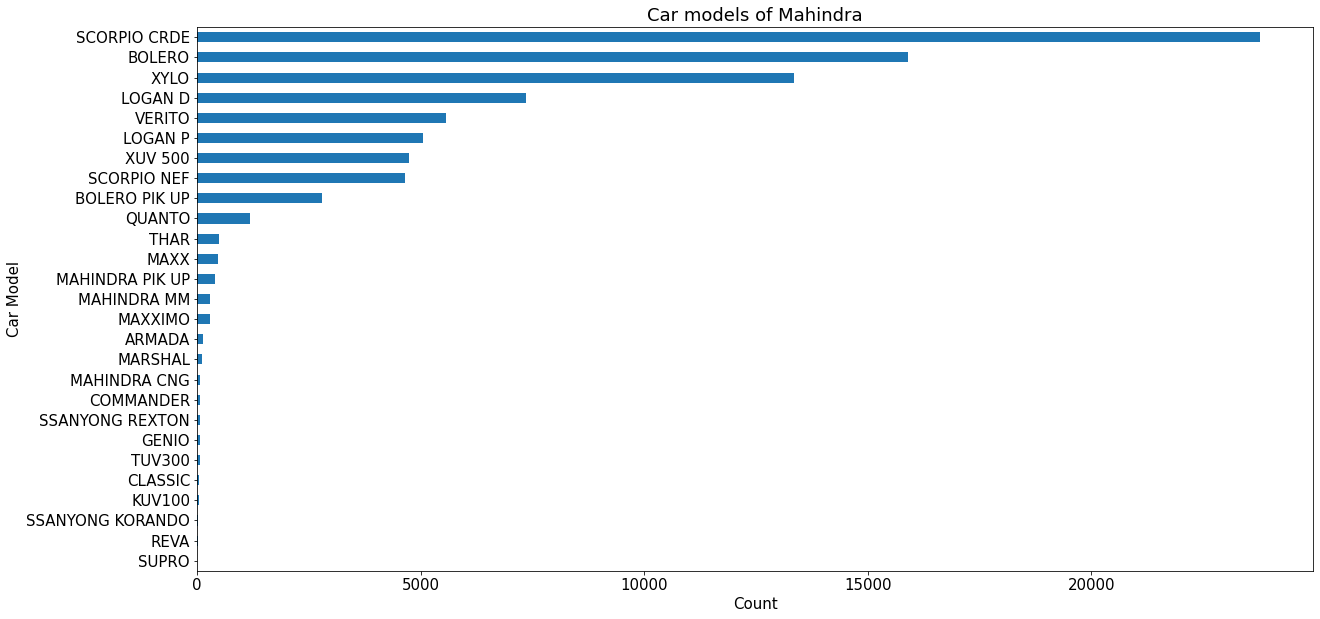

In [262]:
Final_Invoice[(Final_Invoice['Make']=='MAHINDRA &  MAHINDRA')]['Model'].value_counts().sort_values(ascending=True).plot.barh(figsize=(20,10))
plt.xlabel("Count")
plt.ylabel("Car Model")
plt.title("Car models of Mahindra")

In [ ]:
Final_Invoice[(Final_Invoice['Make']=='MARUTI SUZUKI')]['Model'].value_counts().sort_values(ascending=True).plot.barh(figsize=(20,10))
plt.xlabel("Count")
plt.ylabel("Car Model")
plt.title("Car models of Maruti Suzuki")

In [ ]:
Final_Invoice[(Final_Invoice['Make']=='MARUTI SUZUKI')]['Model'].value_counts().sort_values(ascending=True).plot.barh(figsize=(20,10))
plt.xlabel("Count")
plt.ylabel("Car Model")
plt.title("Car models of Maruti Suzuki")

In [263]:
Final_Invoice['Total Amt Wtd Tax.'].sum()

2163712371.2599998

In [267]:
Final_Invoice['Model'].value_counts().reset_index()['Model'].sum()

490789

In [270]:
Final_Invoice['Regn No'].value_counts().reset_index()['Regn No'].sum()

492298

In [273]:
Final_Invoice['Customer No.'].nunique()

253484

In [271]:
Final_Invoice.isnull().sum()

Unnamed: 0                  0
Cust Type                   0
Customer No.                0
Invoice Date                0
Invoice No                  0
Job Card No                 0
JobCard Date                0
KMs Reading                 0
Labour Total                0
Make                        0
Misc Total                  0
Model                    1525
OSL Total                   0
Order Type                  0
Parts Total                 0
Pin code                    0
Plant                       0
Plant Name1                 0
Recovrbl Exp                0
Regn No                    16
Total Amt Wtd Tax.          0
User ID                     0
Client State Name       11504
Client District Name    11504
Client latitude         47246
Client longitude        47246
Country                     0
Car_Segment                 0
Plant Postal Code           0
Plant State Name            0
Plant District Name         0
Plant latitude              0
Plant longitude             0
Plant Name

In [272]:
Final_Invoice['Regn No'].nunique()

260324

In [274]:
Final_Invoice['Order Type'].value_counts()

Running Repairs      269455
Paid Service         135004
Accidental            44159
SMC Redemption        15738
Mechanical            15100
SMC Value Package      9781
Repeat Order           3043
WBW Order                17
Workshop Damage          17
Name: Order Type, dtype: int64

In [275]:
Final_Invoice['Model'].unique()

array(['SPARK', 'INDICA', 'ZEN', 'SANTRO XING', 'INNOVA', 'CITY',
       'SWIFT DZIRE', 'INDIGO', 'ALTO', 'WAGONR', 'SANTRO', 'I10',
       'VISTA', 'AVEO', 'GRAND PUNTO', 'FIESTA', 'RAPID', 'TAVERA',
       'XYLO', 'POLO', 'LOGAN P', 'SWIFT', 'FIGO', 'VERITO',
       'ESTEEM 1300', 'SCORPIO CRDE', 'SCORPIO NEF', 'ACCENT', '800',
       'SAFARI', 'ZEN ESTILO', 'I20', 'VERNA', 'ETIOS', 'LOGAN D', 'GETZ',
       'RITZ', 'IKON', 'CIVIC', 'XUV 500', 'SUMO', 'PALIO', 'BEAT',
       'OPTRA', 'SX4', 'LAURA', 'JAZZ', 'EON', 'LINEA', 'QUALIS',
       'INDIGO MANZA', 'FABIA', 'COROLLA', 'VENTO', 'BOLERO',
       'SUPER SUNNY', 'EECO', 'ADVENTURE', 'CHEVROLET CRUZE', 'OCTAVIA',
       'AVEO UV-A', 'OPEL', nan, 'INDIGO MARINA', 'FORTUNER', 'MAXX',
       'DUSTER', 'MICRA', 'ENDEAVOUR', 'FUSION', 'BRIO', 'RENAULT 1.9',
       'OMNI', 'SUPERB', 'NANO', 'OPEL CORSA', 'A STAR', 'E-CLASS',
       'LANCER', 'SAIL', 'CR-V', 'JETTA', 'COROLLA ALTIS', 'CAPTIVA',
       'MAGIC', 'QUANTO', 'SSANYONG KORANDO'

In [277]:
Final_Invoice['Make'].unique()

array(['GENERAL MOTORS', 'TATA MOTORS', 'MARUTI SUZUKI', 'HYUNDAI',
       'TOYOTA', 'HONDA', 'FIAT', 'FORD', 'SKODA', 'MAHINDRA &  MAHINDRA',
       'VOLKSWAGEN', 'NISSAN', 'RENAULT', 'MERCEDES BENZ',
       'MITSUBISHI MOTORS', 'DAEWOO', 'BMW', 'FORCE', 'SONALIKA', 'VOLVO',
       'HINDUSTAN MOTORS', 'AUDI', 'PREMIER\xa0AUTOMOBILES', 'PORCHE',
       'LAND ROVER', 'JEEP', 'MORRIS', 'SAN MOTORS'], dtype=object)

In [278]:
Final_Invoice[(Final_Invoice['Make']=="MITSUBISHI MOTORS")]['Model'].value_counts()

LANCER       899
PAJERO       361
CEDIA         98
MONTERO       43
OUTLANDER     26
Name: Model, dtype: int64

In [276]:
Final_Invoice['Model'].nunique()

245

In [283]:
high_end_models=[]
for i,j in zip(Final_Invoice['Make'], Final_Invoice['Model']):
    if i in high_end:
        if j=="PAJERO" or j=="MONTERO" or j=="OUTLANDER":
            high_end_models.append(i)
        else:
            break
        high_end_models.append(j)

In [284]:
high_end_models

[]

In [285]:
Final_Invoice.columns

Index(['Unnamed: 0', 'Cust Type', 'Customer No.', 'Invoice Date', 'Invoice No',
       'Job Card No', 'JobCard Date', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'OSL Total', 'Order Type', 'Parts Total',
       'Pin code', 'Plant', 'Plant Name1', 'Recovrbl Exp', 'Regn No',
       'Total Amt Wtd Tax.', 'User ID', 'Client State Name',
       'Client District Name', 'Client latitude', 'Client longitude',
       'Country', 'Car_Segment', 'Plant Postal Code', 'Plant State Name',
       'Plant District Name', 'Plant latitude', 'Plant longitude',
       'Plant Name', 'Client Dist. lat', 'Client Dist. lon',
       'Client State lat', 'Client State lon', 'Plant Dist. lat',
       'Plant Dist. lon', 'Plant State lat', 'Plant State lon', 'Duration',
       'Fiscal_Year', 'Fiscal_Year[Month]', 'Fiscal_Year[Year]', 'time_diff'],
      dtype='object')

In [288]:
#px.scatter(x=Final_Invoice['time_diff'],y=Final_Invoice['Total Amt Wtd Tax.'])

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Change column display number during print
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
#import qgrid
# To display float with 2 decimal, avoid scientific printing
# pd.options.display.float_format = '{:.4f}'.format

<ipython-input-289-e5bccd9f0a25>:14: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



In [291]:
from sklearn.preprocessing import scale

In [292]:
# Scale All features
cols = list(features)
for col in cols:
    features[col] = scale(np.array(features[col]))

features.head()

IndexError: arrays used as indices must be of integer (or boolean) type

In [293]:
def encode(df):
    categorical=list(df.select_dtypes(include=['category','object']))
    for feature in categorical:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df

In [294]:
X=Final_Invoice[['Cust Type', 'Customer No.', 'Invoice Date','JobCard Date', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'OSL Total', 'Order Type', 'Parts Total',
        'Plant', 'Recovrbl Exp', 'Regn No',
       'Total Amt Wtd Tax.', 'Client State Name',
       'Client latitude', 'Client longitude',
       'Car_Segment','Plant State Name',
        'Plant latitude', 'Plant longitude',
        'Fiscal_Year', 'Fiscal_Year[Month]', 'Fiscal_Year[Year]']]

In [301]:
Final_Invoice.columns

Index(['Unnamed: 0', 'Cust Type', 'Customer No.', 'Invoice Date', 'Invoice No',
       'Job Card No', 'JobCard Date', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'OSL Total', 'Order Type', 'Parts Total',
       'Pin code', 'Plant', 'Plant Name1', 'Recovrbl Exp', 'Regn No',
       'Total Amt Wtd Tax.', 'User ID', 'Client State Name',
       'Client District Name', 'Client latitude', 'Client longitude',
       'Country', 'Car_Segment', 'Plant Postal Code', 'Plant State Name',
       'Plant District Name', 'Plant latitude', 'Plant longitude',
       'Plant Name', 'Client Dist. lat', 'Client Dist. lon',
       'Client State lat', 'Client State lon', 'Plant Dist. lat',
       'Plant Dist. lon', 'Plant State lat', 'Plant State lon', 'Duration',
       'Fiscal_Year', 'Fiscal_Year[Month]', 'Fiscal_Year[Year]', 'time_diff'],
      dtype='object')

In [311]:
CPV=Final_Invoice.groupby(['Customer No.','Fiscal_Year[Month]','Fiscal_Year[Year]'])['Total Amt Wtd Tax.'].mean().reset_index().groupby(['Customer No.'])['Total Amt Wtd Tax.'].mean()

In [321]:
CPV=pd.DataFrame(CPV.reset_index())

In [327]:
CPV

,Customer No.,Total Amt Wtd Tax.
0,1,0.000000
1,10,2221.112000
2,100,10399.870000
3,1000,1468.906667
4,10000,205.812500
...,...,...
253479,PLX241,3477.370000
253480,PLX277,6870.950000
253481,PLX312,567.800000
253482,PLX380,4346.980000


In [345]:
pd.DataFrame(Final_Invoice['Customer No.'].value_counts())/55


,Customer No.
E4981,48.509091
E11206,12.509091
412,11.090909
14505,8.018182
MFCWP01,6.545455
...,...
50821,0.018182
129637,0.018182
46440,0.018182
186154,0.018182


In [353]:
freq=pd.DataFrame(Final_Invoice['Customer No.'].value_counts())/55
pd.DataFrame(freq['Customer No.'].values*CPV['Total Amt Wtd Tax.'].values)

,0
0,0.000000
1,27784.091927
2,115344.012727
3,11777.960727
4,1347.136364
...,...
253479,63.224909
253480,124.926364
253481,10.323636
253482,79.036000


In [355]:
CPV['Average_cust_val']=pd.DataFrame(freq['Customer No.'].values*CPV['Total Amt Wtd Tax.'].values)
CPV

,Customer No.,Total Amt Wtd Tax.,Average_cust_val
0,1,0.000000,0.000000
1,10,2221.112000,27784.091927
2,100,10399.870000,115344.012727
3,1000,1468.906667,11777.960727
4,10000,205.812500,1347.136364
...,...,...,...
253479,PLX241,3477.370000,63.224909
253480,PLX277,6870.950000,124.926364
253481,PLX312,567.800000,10.323636
253482,PLX380,4346.980000,79.036000


In [356]:
CPV['Average_cust_val']=CPV['Average_cust_val']*12

In [357]:
CPV['Average_cust_val']

0         0.000000e+00
1         3.334091e+05
2         1.384128e+06
3         1.413355e+05
4         1.616564e+04
              ...     
253479    7.586989e+02
253480    1.499116e+03
253481    1.238836e+02
253482    9.484320e+02
253483    0.000000e+00
Name: Average_cust_val, Length: 253484, dtype: float64

In [358]:
Final_Invoice.columns

Index(['Unnamed: 0', 'Cust Type', 'Customer No.', 'Invoice Date', 'Invoice No',
       'Job Card No', 'JobCard Date', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'OSL Total', 'Order Type', 'Parts Total',
       'Pin code', 'Plant', 'Plant Name1', 'Recovrbl Exp', 'Regn No',
       'Total Amt Wtd Tax.', 'User ID', 'Client State Name',
       'Client District Name', 'Client latitude', 'Client longitude',
       'Country', 'Car_Segment', 'Plant Postal Code', 'Plant State Name',
       'Plant District Name', 'Plant latitude', 'Plant longitude',
       'Plant Name', 'Client Dist. lat', 'Client Dist. lon',
       'Client State lat', 'Client State lon', 'Plant Dist. lat',
       'Plant Dist. lon', 'Plant State lat', 'Plant State lon', 'Duration',
       'Fiscal_Year', 'Fiscal_Year[Month]', 'Fiscal_Year[Year]', 'time_diff'],
      dtype='object')

In [364]:
Customer=Final_Invoice[['Customer No.','Client Dist. lat','Client State lon']]
Customer

,Customer No.,Client Dist. lat,Client State lon
0,67849,19.194329,75.674158
1,84419,19.194329,75.674158
2,81055,19.194329,75.674158
3,84419,19.194329,75.674158
4,18980,19.194329,75.674158
...,...,...,...
492309,203820,NaN,78.366535
492310,170411,NaN,78.366535
492311,48811,NaN,78.366535
492312,204067,13.083694,78.366535


In [362]:
Customer.isnull().sum()

Customer No.               0     
Client Dist. lat           79534 
Client State lon           11504 
Customer_Lifetime_Value    238830
dtype: int64

In [336]:
freq

,Customer No.
E4981,0.881983
E11206,0.227438
412,0.201653
14505,0.145785
MFCWP01,0.119008
...,...
50821,0.000331
129637,0.000331
46440,0.000331
186154,0.000331


In [340]:
CPV['Total Amt Wtd Tax.']*freq['Customer No.']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
PLX241   NaN
PLX277   NaN
PLX312   NaN
PLX380   NaN
PLX386   NaN
Length: 506968, dtype: float64

In [328]:
Average_Customer_Value=CPV['Total Amt Wtd Tax.']*freq_per_month['Customer No.']

In [ ]:
new_list_freq=[]
for i in CPV['Fiscal_Year[Month]']:
    new_list_freq
    

In [ ]:
CPV[(CPV['Fiscal_Year[Month]']==2)]['Customer No'].value_counts()

Average_Cust_value=CPV*Frequency
Duration of relationship(Lifespan)
CLTV=Average_Cust_value*12
Plot on tableau